**SETUP**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as matplot
import sys
sys.path.insert(0,'classes')

# Regresión Lineal Múltiple
**Ejercicio 8**
Entrene un combinador lineal que reciba tres dígitos binarios y devuelva el número decimal correspondiente.
* a. Utilizando el bias o peso W0
* b. Utilizando únicamente las tres entradas correspondientes a los dígitos binarios sin el bias.

Compare la cantidad de iteraciones necesarias para obtener el vector de pesos correcto en ambos casos. Observe el valor del arco correspondiente al bias en a).

In [14]:
df_digitos = pd.read_csv('data/digitos_b_d.csv', dtype='object')

In [15]:
elems_count = len(df_digitos['binario'])
x = np.array(df_digitos['binario'])             #entrada
d = np.array(df_digitos['decimal'], dtype=int)  #lo que busco predecir

Antes de comenzar con el entrenamiento, convierto los strings binarios a arreglos de ceros y unos, con esta forma ya están normalizados.

In [16]:
#Convierto la entrada en un arreglo de 4 entradas por ejemplo
x_inputs = np.zeros(shape=(len(x),len(x[0])), dtype=int)
# Recorro los elementos del arreglo x y lo paso a la matriz x_inputs
for i in range(elems_count):
  for j in range(3):
    x_inputs[i][j] = int(x[i][j])
x_inputs

array([[0, 0, 1],
       [1, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 1],
       [1, 1, 1],
       [1, 0, 1]])

Entrene un combinador lineal que reciba tres dígitos binarios y devuelva el número decimal correspondiente.

**a.** Utilizando el bias o peso W0

# FIT

In [17]:
"""Defino los parametros de la neurona"""
alpha=0.01
max_iter=100
cota_error=10e-03
"""Los pesos ahora son una matriz de X por Y, siendo X la cantidad de nros.
binarios e Y la cantidad de digitos del nro. o sea el nro. de bits. """
#Inicializo los pesos en 1: [1,1,1,1]
w = np.ones(shape=3, dtype=float)

"""Entrenamiento de la neurona lineal"""
errors = []
examples_count = len(x_inputs)    # nro. de ejemplos (filas de mi dataset)
inputs_count = len(x_inputs[0])   # nro. de columnas (entradas de la neurona)

ErrorAnt = 0
ErrorAct = 1
ite = 0

while (ite < max_iter) and (np.abs(ErrorAnt- ErrorAct) > cota_error):

    ErrorAnt = ErrorAct
    ErrorAct = 0

    #Recorro todos los ejemplos
    for e in range(examples_count):

        #Sumatoria
        sum = 0.0

        #Tomo el e-esimo ejemplo
        input = x_inputs[e]   # [X,X,X,X]

        #Calculo la neta - Sin el bias
        for i in range(inputs_count):
          sum = sum + (input[i] * w[i])

        #Salida es igual a la sumatoria de los productos
        y = sum

        #Calculo el error
        error = d[e] - y

        #Actualizo los pesos
        for p in range(inputs_count):
          w[p]= w[p] + alpha * error * input[p]

        ErrorAct = ErrorAct + (error**2)

    errors.append(ErrorAct)

    ite = ite + 1

In [18]:
ite

92

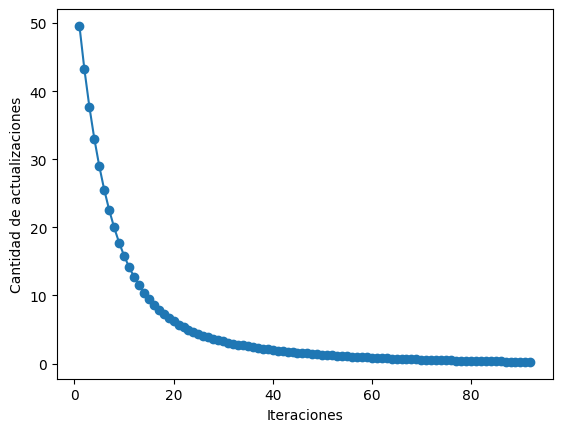

In [19]:
matplot.plot(range(1, len(errors) + 1), errors, marker='o')
matplot.xlabel('Iteraciones')
matplot.ylabel('Cantidad de actualizaciones')
matplot.show()

In [20]:
w

array([3.73774272, 2.05281256, 1.20715038])

# PREDICT

In [21]:
for e in range(examples_count):

    #Sumatoria
    sum = 0.0

    #Tomo el e-esimo ejemplo
    input = x_inputs[e]   # [X,X,X,X]

    #Calculo la neta - Sin el bias
    for i in range(inputs_count):
      sum = sum + (input[i] * w[i])

    #Salida es igual a la sumatoria de los productos
    y = sum

    #Imprimo lo que esperaba y lo que efectivamente me dió
    print(d[e], y)

1 1.207150382203098
6 5.790555272287089
2 2.052812555390637
4 3.7377427168964523
3 3.259962937593735
7 6.997705654490187
5 4.94489309909955


**b.** Utilizando únicamente las tres entradas correspondientes a los dígitos binarios sin el bias.

In [22]:
df_digitos = pd.read_csv('data/digitos_b_d.csv', dtype='object')
elems_count = len(df_digitos['binario'])
x = np.array(df_digitos['binario'])
d = np.array(df_digitos['decimal'], dtype=int)
x_inputs = np.zeros(shape=(len(x),len(x[0])), dtype=int)

for i in range(elems_count):
  for j in range(3):
    x_inputs[i][j] = int(x[i][j])

# FIT

In [23]:
"""Defino los parametros de la neurona"""
alpha=0.01
max_iter=100
cota_error=10e-03
"""Los pesos ahora son una matriz de X por Y, siendo X la cantidad de nros.
binarios e Y la cantidad de digitos del nro. o sea el nro. de bits. """
#Inicializo los pesos en 1: [1,1,1,1]
w = np.ones(shape=3, dtype=float)
b = 1

"""Entrenamiento de la neurona lineal"""
errors = []
examples_count = len(x_inputs)    # nro. de ejemplos (filas de mi dataset)
inputs_count = len(x_inputs[0])   # nro. de columnas (entradas de la neurona)

ErrorAnt = 0
ErrorAct = 1
ite = 0

while (ite < max_iter) and (np.abs(ErrorAnt- ErrorAct) > cota_error):

    ErrorAnt = ErrorAct
    ErrorAct = 0

    #Recorro todos los ejemplos
    for e in range(examples_count):

        #Sumatoria
        sum = 0.0

        #Tomo el e-esimo ejemplo
        input = x_inputs[e]   # [X,X,X,X]

        #Calculo la neta - Sin el bias
        for i in range(inputs_count):
          sum = sum + (input[i] * w[i])

        #Salida es igual a la sumatoria de los productos
        y = sum + b

        #Calculo el error
        error = d[e] - y

        #Actualizo los pesos
        for p in range(inputs_count):
          w[p]= w[p] + alpha * error * input[p]
        b = b + alpha * error

        ErrorAct = ErrorAct + (error**2)

    errors.append(ErrorAct)

    ite = ite + 1

In [24]:
ite

100

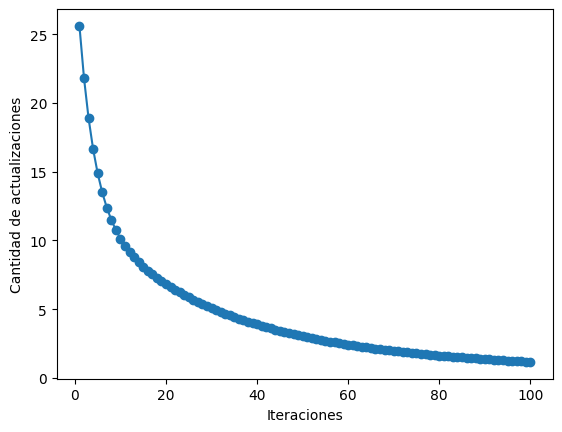

In [25]:
matplot.plot(range(1, len(errors) + 1), errors, marker='o')
matplot.xlabel('Iteraciones')
matplot.ylabel('Cantidad de actualizaciones')
matplot.show()

In [26]:
w

array([3.26227463, 1.53437918, 0.66289206])

In [27]:
b

0.9663208857502944

# PREDICT

In [28]:
for e in range(examples_count):

    #Sumatoria
    sum = 0.0

    #Tomo el e-esimo ejemplo
    input = x_inputs[e]   # [X,X,X,X]

    #Calculo la neta - Sin el bias
    for i in range(inputs_count):
      sum = sum + (input[i] * w[i])

    #Salida es igual a la sumatoria de los productos
    y = sum + b

    #Imprimo lo que esperaba y lo que efectivamente me dió
    print(d[e], y)

1 1.6292129452052535
6 5.762974696017915
2 2.500700061190628
4 4.228595520577582
3 3.163592120645587
7 6.425866755472875
5 4.891487580032542
